In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
import pmdarima

# AR(P) Processes 

Consider an AR(2) process 

$ \phi_1 = 1.1 \space \space \phi_2 = -0.25 $

D:\Applications\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


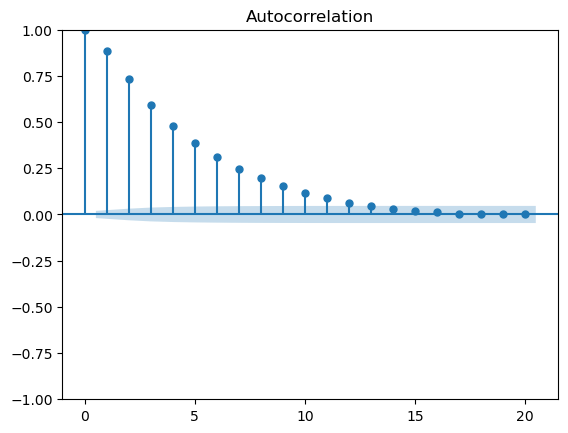

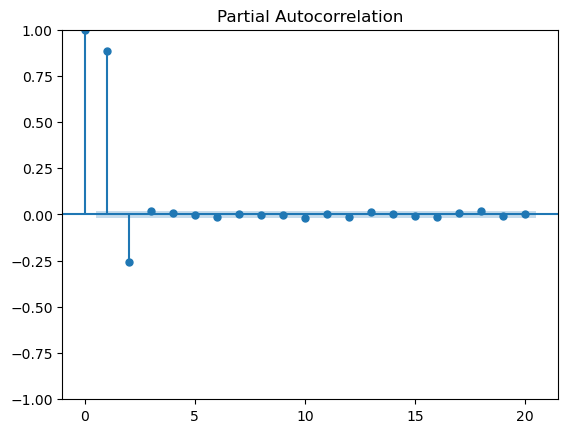

In [17]:
#AR(2)
def create_series(n, phi0, phi1, phi2):
    residuals = np.random.normal(0, 0.25, n)
    time_series = [residuals[0], residuals[1]]
    for i in range(n-2):
        time_series.append(phi0 + phi1 * time_series[i+1] + phi2 * time_series[i] + residuals[i+2])
    return time_series

time_series = create_series(10000, 0, 1.1, -0.25)
plot_acf(time_series, lags=20);
plot_pacf(time_series, lags=20);

# Question 3 - PPI Revisited

Lets do some recalculation for AR(1) of the log growth rate of the series

In [18]:
df = pd.read_excel("PPIFGS.xls", parse_dates=['DATE'], index_col="DATE")
df.rename({'VALUE': 'PPI'}, axis=1, inplace=True)
df['Log(PPI)'] = np.log(1+df["PPI"])
df['ChangeLog(PPI)'] = df['Log(PPI)'] - df['Log(PPI)'].shift(1)
df = df.dropna()
df

,PPI,Log(PPI),ChangeLog(PPI)
DATE,,,
1947-07-01,26.7,3.321432,0.018215
1947-10-01,27.7,3.356897,0.035465
1948-01-01,28.0,3.367296,0.010399
1948-04-01,28.6,3.387774,0.020479
1948-07-01,28.8,3.394508,0.006734
...,...,...,...
2014-07-01,201.3,5.309752,-0.002962
2014-10-01,196.7,5.286751,-0.023001
2015-01-01,193.3,5.269403,-0.017347


ACF and PACF plots of the log(PPI) growth series. The partial as well as the normal autocorrelations get cutoff at lag 3. So  ARMA(3, 3) should be a good fit

D:\Applications\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


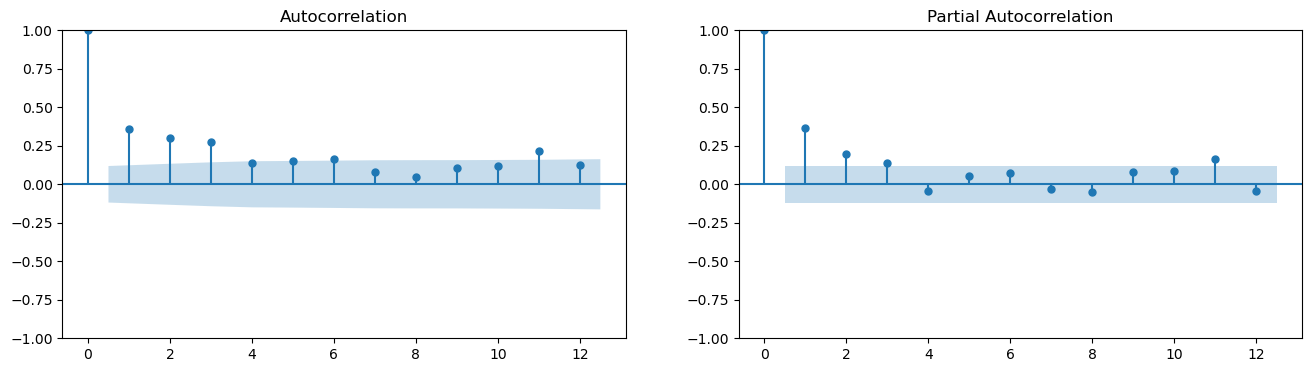

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plot_acf(df["ChangeLog(PPI)"].squeeze(), label="Log of PPI", lags=12, ax=ax[0]);
plot_pacf(df["ChangeLog(PPI)"].squeeze(), label="Log of PPI", lags=12, ax=ax[1]);

In [31]:
#AR(1) 
model = ARIMA(df["ChangeLog(PPI)"], order=(1, 0, 0)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 820.533
Date:                Sun, 05 Feb 2023   AIC                          -1635.067
Time:                        09:25:54   BIC                          -1624.239
Sample:                    07-01-1947   HQIC                         -1630.720
                         - 07-01-2015                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.001      6.278      0.000       0.005       0.009
ar.L1          0.3675      0.063      5.810      0.000       0.243       0.491
sigma2         0.0001   2.79e-05      5.145      0.000    8.87e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):               807.59
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.29
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [32]:
#AR(2) 
model = ARIMA(df["ChangeLog(PPI)"], order=(2, 0, 0)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 826.091
Date:                Sun, 05 Feb 2023   AIC                          -1644.183
Time:                        09:25:55   BIC                          -1629.745
Sample:                    07-01-1947   HQIC                         -1638.387
                         - 07-01-2015                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.001      5.226      0.000       0.004       0.010
ar.L1          0.2860      0.065      4.396      0.000       0.158       0.413
ar.L2          0.2015      0.118      1.712      0.087      -0.029       0.432
sigma2         0.0001   2.99e-05      4.601      0.000     7.9e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1395.28
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.86
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [33]:
#AR(3) 
model = ARIMA(df["ChangeLog(PPI)"], order=(3, 0, 0)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 828.775
Date:                Sun, 05 Feb 2023   AIC                          -1647.550
Time:                        09:25:55   BIC                          -1629.502
Sample:                    07-01-1947   HQIC                         -1640.305
                         - 07-01-2015                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.002      4.521      0.000       0.004       0.010
ar.L1          0.2648      0.062      4.282      0.000       0.144       0.386
ar.L2          0.1570      0.115      1.362      0.173      -0.069       0.383
ar.L3          0.1416      0.055      2.554      0.011       0.033       0.250
sigma2         0.0001   3.04e-05      4.444      0.000    7.54e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1641.23
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.77
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [34]:
#ARMA(1, 1) 
model = ARIMA(df["ChangeLog(PPI)"], order=(1, 0, 1)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 828.158
Date:                Sun, 05 Feb 2023   AIC                          -1648.315
Time:                        09:25:57   BIC                          -1633.878
Sample:                    07-01-1947   HQIC                         -1642.520
                         - 07-01-2015                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.002      4.136      0.000       0.004       0.011
ar.L1          0.8224      0.092      8.908      0.000       0.641       1.003
ma.L1         -0.5513      0.123     -4.472      0.000      -0.793      -0.310
sigma2         0.0001   3.02e-05      4.480      0.000    7.62e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1576.04
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.52
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [36]:
#ARMA(1, 2) 
model = ARIMA(df["ChangeLog(PPI)"], order=(1, 0, 2)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 828.122
Date:                Sun, 05 Feb 2023   AIC                          -1646.245
Time:                        09:26:04   BIC                          -1628.198
Sample:                    07-01-1947   HQIC                         -1639.000
                         - 07-01-2015                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.002      4.512      0.000       0.004       0.010
ar.L1          0.7787      0.118      6.617      0.000       0.548       1.009
ma.L1         -0.5089      0.144     -3.534      0.000      -0.791      -0.227
ma.L2          0.0178      0.124      0.144      0.885      -0.225       0.261
sigma2         0.0001   3.01e-05      4.500      0.000    7.65e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1547.66
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.42
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

In [29]:
#ARMA(1, 3) 
model = ARIMA(df["ChangeLog(PPI)"], order=(1, 0, 3)).fit(cov_type="robust")
model.summary()

D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
D:\Applications\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ChangeLog(PPI)   No. Observations:                  273
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 828.257
Date:                Sun, 05 Feb 2023   AIC                          -1644.513
Time:                        02:02:28   BIC                          -1622.857
Sample:                    07-01-1947   HQIC                         -1635.820
                         - 07-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.002      3.937      0.000       0.004       0.011
ar.L1          0.7453      0.129      5.766      0.000       0.492       0.999
ma.L1         -0.4752      0.129     -3.671      0.000      -0.729      -0.221
ma.L2          0.0281      0.059      0.475      0.635      -0.088       0.144
ma.L3          0.0422      0.089      0.474      0.636      -0.132       0.217
sigma2         0.0001   5.32e-06     25.475      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1619.77
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMA(1, 1) seems like the best fit among all the models since it has lowest std errors and AIC/BIC values

#  Question 5

Since X follows a mean zero AR(1) and X = E(r)

$ E(r_{t+1}) = \phi_{1}r_{t}  $

$ \implies r_{t+1} = \phi_{1}r_t - \sigma_n\epsilon_t + \epsilon_{t+1} $

This is ARMA(1, 1) model with phi1 and -sigma as AR and MA coefficients respectively

Given an arbitrary correlation coefficient for error, we know its corresponding regression coefficient as follows 

$ \phi = Var(\epsilon_{t+1}) \rho $

But since we need to assume stationarity for ensuring an ARMA model 

 $ Var(\epsilon_{t+1}) = K $

where K is constant... Thereby

$ \phi = K \rho $

So our ARMA model looks like

$ r_{t+1} = \phi_{1}r_t - K\rho\epsilon_t + \epsilon_{t+1} $

which is still as ARMA(1, 1) model